# Largest Problem in a Series
The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.


    73167176531330624919225119674426574742355349194934
    96983520312774506326239578318016984801869478851843
    85861560789112949495459501737958331952853208805511
    12540698747158523863050715693290963295227443043557
    66896648950445244523161731856403098711121722383113
    62229893423380308135336276614282806444486645238749
    30358907296290491560440772390713810515859307960866
    70172427121883998797908792274921901699720888093776
    65727333001053367881220235421809751254540594752243
    52584907711670556013604839586446706324415722155397
    53697817977846174064955149290862569321978468622482
    83972241375657056057490261407972968652414535100474
    82166370484403199890008895243450658541227588666881
    16427171479924442928230863465674813919123162824586
    17866458359124566529476545682848912883142607690042
    24219022671055626321111109370544217506941658960408
    07198403850962455444362981230987879927244284909188
    84580156166097919133875499200524063689912560717606
    05886116467109405077541002256983155200055935729725
    71636269561882670428252483600823257530420752963450


Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

## Common Code
Code and variables used by every solution

In [17]:
SERIES = tuple(map(int, filter(lambda c: c.isnumeric(), '''
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
'''
)))

## Solution One - Brute Force
One simple way to solve this problem is to try every possible product in the series

In [18]:
from functools import reduce
from typing import Tuple

from utils.timing import timed


@timed(10)
def solution_one(n: int = 13, series: Tuple[int] = SERIES) -> int:
    """
    finds the maximum n-sized product in the provided series
    
    :param n: size of the product
    :param series: series of numbers
    """
    answer: int = 0

    for start in range(len(series) - n):
        product: int = reduce(lambda a, b: a * b, series[start:start + n])
        answer = product if product > answer else answer

    return answer
    

answer, time = solution_one()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 23514624000
that took: 0.0012170917987532448s


### Solution One Discussion
Solution is already not that bad, we iterate through all the numbers in the series from $0$ to $\text{series size} - \text{product size}$ once, multiplying 13 numbers each time. However, it seems kind of wastefull to not use previous results since for each step only one number changes.

## Solution Two - Using Previous Products and Skipping Zeros
To avoid having to re-multiply similar numbers, we can store previous results and use them to generate the next one. Moreover, once we find a zero, we can skip it since all multiplications that include is would also result in zero.

In [19]:
from typing import Tuple, Union

from utils.timing import timed


@timed(10)
def solution_two(n: int = 13, series: Tuple[int] = SERIES) -> int:
    """
    finds the maximum n-sized product in the provided series
    
    :param n: size of the product
    :param series: series of numbers
    """
    answer: int = 0
    start: int = 0
    previous_product: Union[int, None] = None

    while start < len(series) - n:

        # == use previous product == #
        
        if previous_product:    
            previous_product //= series[start - 1]     # divide by previous start
            previous_product *= series[start + n - 1]  # multiply by new number

            if not series[start + n - 1]:   # skip zero
                previous_product = None
                start = start + n - 1

        # == generate fresh product == #

        else:
            previous_product: int = 1

            for i in range(n):
                previous_product *= series[start + i]

                if not series[start + i]:   # skip zero
                    previous_product = None
                    start = start + i
                    break

        answer = previous_product if previous_product and previous_product > answer else answer

        start += 1
    
    return answer

answer, time = solution_two()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 23514624000
that took: 0.00024935400069807655s


### Solution Two Discussion
Solution two is a very good step up from solution one: not only does it not waste time re-multiplying numbers but also skips over zeros which for larger product sequence sizes speeds things up quite a bit.

## Plots

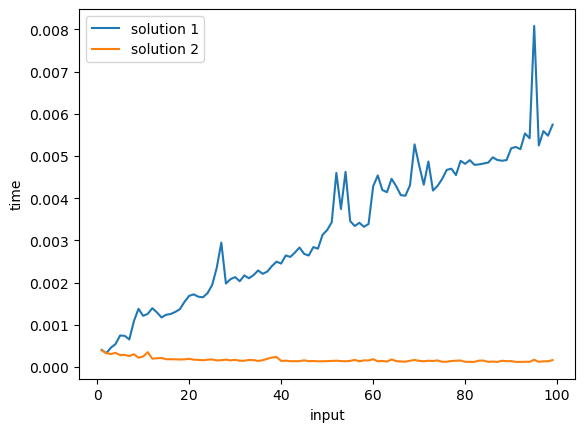

In [20]:
from utils.plotting import plot_range

params = tuple((i, SERIES) for i in range(1, 100))
plot_range(params, (solution_one, solution_two))

In [21]:
len(SERIES)

1000